In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os, cv2
from glob import glob
from PIL import Image, ImageChops

In [2]:
path_pred = "./chomp256/Reconstructions/SDF"
path_true = "./data/random_obstacle/SDF/eval"
filenames_pred = sorted(glob(os.path.join(path_pred, "*.npy")))
sdf_pred = [np.load(f) for f in filenames_pred]
filenames_true = sorted(glob(os.path.join(path_true, "*.npy")))
sdf_true = [np.load(f) for f in filenames_true]

In [ ]:
plt.savefig()

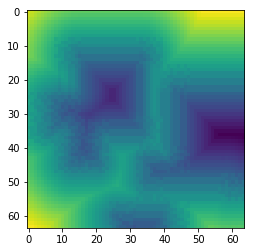

In [6]:
plt.imshow(sdf_true[1])
plt.savefig('./data/sdf_map.png')

In [7]:
import matplotlib.image as mpimg

mpimg.imsave('./data/sdf_map.png', sdf_true[1])

In [4]:
sdf_pred[0].reshape(64,64)

array([[0.23556902, 0.21602765, 0.20276833, ..., 0.39039296, 0.40290236,
        0.4192778 ],
       [0.21612488, 0.1968512 , 0.18573341, ..., 0.38281044, 0.39467922,
        0.41168335],
       [0.20220946, 0.18829124, 0.17664987, ..., 0.3803084 , 0.39184833,
        0.4084619 ],
       ...,
       [0.43455628, 0.42163348, 0.41114432, ..., 0.5092624 , 0.51710296,
        0.5274314 ],
       [0.44780457, 0.43726236, 0.42617825, ..., 0.5126084 , 0.5226015 ,
        0.5325489 ],
       [0.4596424 , 0.44943744, 0.43984607, ..., 0.52050924, 0.528355  ,
        0.5378127 ]], dtype=float32)

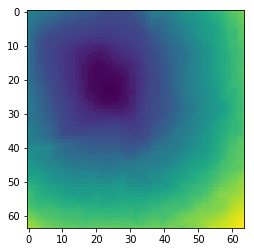

In [5]:
plt.imshow(sdf_pred[0].reshape(64,64))

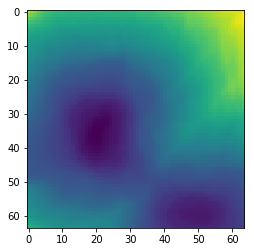

In [6]:
#first epoch latest
plt.imshow(sdf_pred[5].reshape(64,64))

In [15]:
def compare(img_nb, sdf_pred=sdf_pred, sdf_true=sdf_true):
    sdf_pred = sdf_pred[img_nb].reshape(64,64) 
    sdf_true = sdf_true[img_nb]
    print(sdf_true.shape)
    pil_pred = Image.fromarray(sdf_pred)
    pil_true = Image.fromarray(sdf_true)
#     diff = ImageChops.difference(pil_pred, pil_true)
#     if diff.getbox():
#         diff.show()
    f, axs = plt.subplots(1,2, sharey=True)
    axs[0].imshow(sdf_pred)
    axs[0].set_title("sdf_pred")
    
    axs[1].imshow(sdf_true)
    axs[0].set_title("sdf_true")

#     plt.imshow(sdf_pred)
#     plt.imshow(sdf_true)
#     plt.legend(["Reconstructed sdf", "True sdf"])


(64, 64)


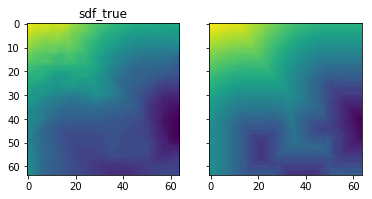

In [21]:
compare(6)

In [18]:
f = "./data/random_obstacle/SDF/train/sdf_labels.npy"

In [46]:
sdf = np.load(f)

In [47]:
from sklearn.preprocessing import StandardScaler

In [53]:
sdf.max(axis=0)

array([[72.13875519, 71.44928271, 70.76722405, ..., 60.8358447 ,
        61.26989473, 61.7170965 ],
       [71.42128534, 70.72481884, 70.03570518, ..., 59.93329626,
        60.37383539, 60.8276253 ],
       [70.71067812, 70.00714249, 69.3108938 , ..., 59.03388857,
        59.48108943, 59.94163828],
       ...,
       [60.41522987, 59.53990259, 58.66856058, ..., 46.09772229,
        46.66904756, 47.38143096],
       [60.90155991, 60.03332408, 59.16924877, ..., 47.01063709,
        47.42362281, 48.08326112],
       [61.40032573, 60.53924347, 59.68249325, ..., 47.92702787,
        48.33218389, 48.7954916 ]])

In [42]:
scaler = StandardScaler(with_mean=False)
sdf = sdf.reshape((sdf.shape[0], -1))

In [43]:
sdf = scaler.fit_transform(sdf)

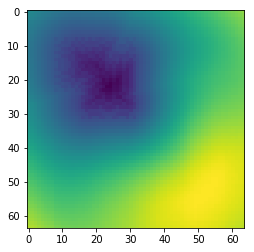

In [45]:
plt.imshow(sdf[0].reshape(64,64))

In [54]:
import math

In [55]:
math.sqrt(4096+4096)

90.50966799187809

In [9]:
import torch

In [12]:
points = ((0,0),
          (1,2),
          (3,4),
          (6,5),
          (10,3),
          (15,4))
points = np.array(points, dtype=float)

In [13]:
d = np.diff(points, axis=0)

In [14]:
d

array([[ 1.,  2.],
       [ 2.,  2.],
       [ 3.,  1.],
       [ 4., -2.],
       [ 5.,  1.]])

In [15]:
segdists = np.sqrt((d ** 2).sum(axis=1))

In [16]:
segdists

array([2.23606798, 2.82842712, 3.16227766, 4.47213595, 5.09901951])

In [18]:
np.linalg.norm([1,2])

2.23606797749979